In [43]:
import csv, os, glob
import random
import numpy as np
from numpy.fft import rfft
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.svm import SVC

from scipy.spatial import distance
from scipy.signal import decimate
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import decomposition
import time

from helpers import *

import pandas as pd

import matplotlib.pyplot as pp

In [95]:
def addGradient_sk(data_array, feature):
    data_shape = list(data_array.shape)
    data_shape[1] += 1
    new_data_array = np.zeros(data_shape)
    new_data_array[0:data_array.shape[0],0:data_array.shape[1]] = data_array
    new_data_array[:,-1] = np.gradient(data_array[:,feature])
    return new_data_array

categories = [loadData("./csv_data/november_11_collisions/hard_moving"),loadData("./csv_data/november_11_collisions/hard_still"),
                        loadData("./csv_data/november_11_collisions/soft_moving"),loadData("./csv_data/november_11_collisions/soft_still"),
                        loadData("./csv_data/november_11_collisions/no_collision")]

# Split the data into tuples of processed data and labels
dataPairs = []

# Remove time and figure out max length
max_length = 0
num_samples = 0
idx_to_keep = [2,3]

for i, c in enumerate(categories):
    for sample_idx in range(0,len(c)):
        num_samples += 1
        c[sample_idx] = cropFeatures(c[sample_idx],idx_to_keep)
        if len(c[sample_idx]) > max_length:
            max_length = len(c[sample_idx])



# Convert to np array, decimate, pad, normalize, and flatten
num_features = len(idx_to_keep) + 2 + 2
decimate_factor = 1
max_length = max_length // decimate_factor
X_all = np.zeros((num_samples, max_length , num_features))
y_all = np.zeros((num_samples))

sample_idx = 0
for i, c in enumerate(categories):
    for arr in c:
        arr = np.asarray(arr)
        #arr = decimate(arr,decimate_factor,axis=0)
        arr = np.pad(arr,[(0,max_length - arr.shape[0]),(0,0)],mode="edge")
        arr = addFFT_sk(arr,0,110)
        arr = addFFT_sk(arr,1,110)
        arr = addGradient_sk(arr,0)
        arr = addGradient_sk(arr,1)
        #arr = normalizeFeatures(arr)
        #arr = arr.flatten()
        X_all[sample_idx] = arr

        # 5-fold classification
        y_all[sample_idx] = i

        # Classifying soft vs hard
        #if i == 0 or i == 1:
        #    y_all[sample_idx] = 0
        #else:
        #    y_all[sample_idx] = 1

        # Classifying moving vs still
        #if i == 0 or i == 2:
        #    y_all[sample_idx] = 0
        #else:
        #    y_all[sample_idx] = 1

        sample_idx += 1

In [84]:
print("HarD_moving starts at: 0")
print("Hard_Still starts at:",np.where(y_all==1)[0][0])
print("Soft_moving starts at:",np.where(y_all==2)[0][0])
print("Soft_still starts at:",np.where(y_all==3)[0][0])
print("No collision starts at:",np.where(y_all==4)[0][0])

HarD_moving starts at: 0
Hard_Still starts at: 12
Soft_moving starts at: 26
Soft_still starts at: 38
No collision starts at: 50


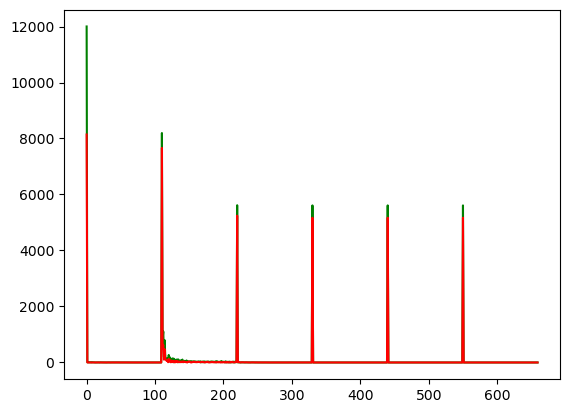

In [106]:
# Visualizing things
idx_1 = 10
idx_2 = 38
feature = 2
pp.plot(X_all[idx_1,:,feature],'g')
pp.plot(X_all[idx_2,:,feature],'r')
pp.show()